In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Distributions ##

In [2]:
united = Table.read_table('united_summer2015.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')

In [3]:
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


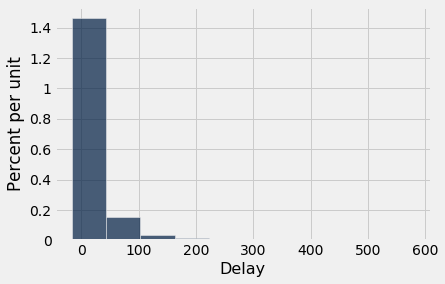

In [5]:
united.hist('Delay')

In [6]:
def sample_median(size):
    return np.median(united.sample(size).column('Delay'))

In [14]:
sample_median(10)

5.0

In [15]:
sample_medians_10 = make_array()
sample_medians_100 = make_array()
sample_medians_1000 = make_array()

for i in np.arange(1000):
    new_median_10 = sample_median(10)
    sample_medians_10 = np.append(sample_medians_10, new_median_10)
    new_median_100 = sample_median(100)
    sample_medians_100 = np.append(sample_medians_100, new_median_100)
    new_median_1000 = sample_median(1000)
    sample_medians_1000 = np.append(sample_medians_1000, new_median_1000)

In [16]:
sample_medians = Table().with_column('Size 10', sample_medians_10, 
                                     'Size 100', sample_medians_100,
                                     'Size 1000', sample_medians_1000)

In [17]:
min(sample_medians_10), max(sample_medians_10)

(-7.0, 70.5)

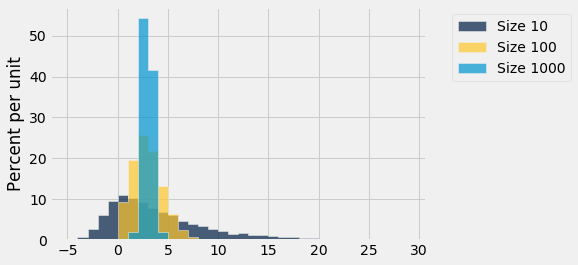

In [18]:
sample_medians.hist(bins = np.arange(-5, 30))

## Swain vs. Alabama ##

In [19]:
population_proportions = make_array(.26, .74)
population_proportions

array([0.26, 0.74])

In [44]:
sample_proportions(100, population_proportions)

array([0.27, 0.73])

In [48]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [56]:
panel_proportion()

0.26

In [63]:
panels = make_array()

for i in np.arange(10000):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

In [64]:
panels

array([28., 29., 29., ..., 28., 24., 27.])

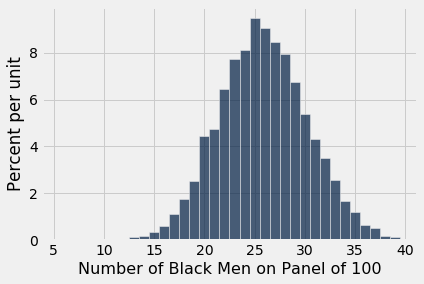

In [66]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))

## Mendel and Pea Flowers ##

In [67]:
## Mendel had 929 plants, of which 709 had purple flowers
709 / 929

0.7631862217438106

In [75]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([0.74488698, 0.25511302])

In [78]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [83]:
purple_flowers()

74.27341227125942

In [87]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

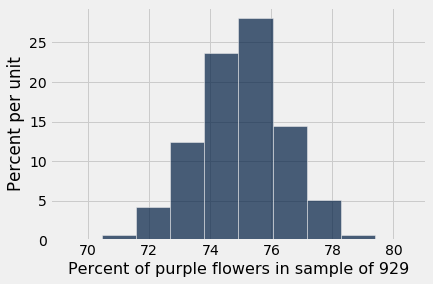

In [88]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()

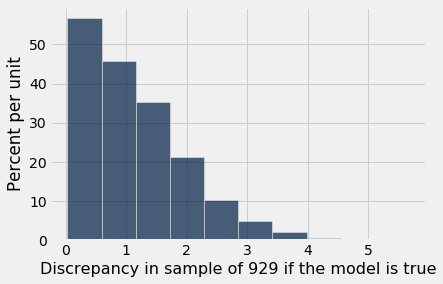

In [90]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()

In [91]:
(709 / 929 * 100 - 75)

1.318622174381062